In [1]:
%pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['duration'].std()

np.float64(42.59435124195458)

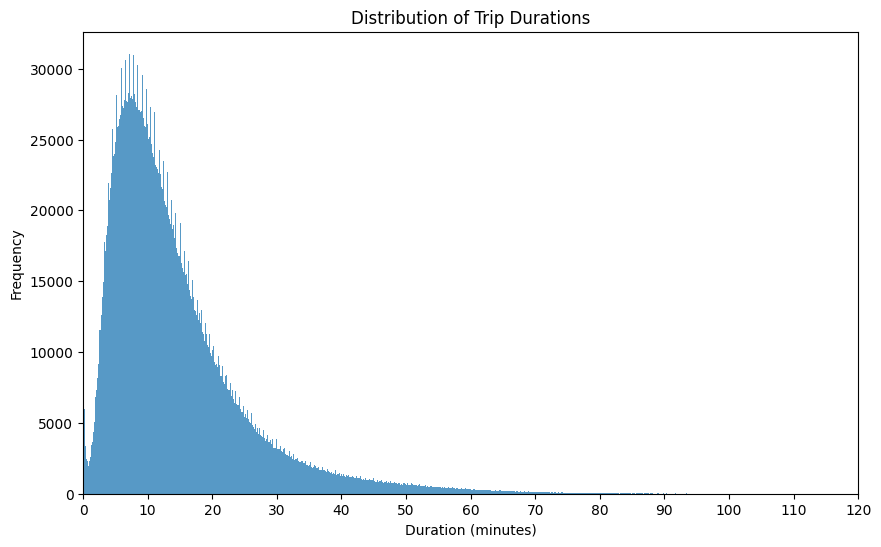

In [ ]:
#create the histogram
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['duration'], ax=ax)
ax.set_xticks(range(0, 121, 10))
ax.set_xlim(0, 120)
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Trip Durations')


plt.show()

In [ ]:
#Filter outliers and compute rest amount of data
df_wo = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
(len(df_wo) / len(df)) * 100

98.1220282212598

In [ ]:
#Create feature matrix
dict_list = df_wo[['PULocationID', 'DOLocationID']].astype(str).to_dict(orient='records')
vec = DictVectorizer(sparse=True)
X_encoded = vec.fit_transform(dict_list)

In [ ]:
#Dimensionality from the stored elements
X_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

In [ ]:
#Fit model on X_encoded variable
lr1 = LinearRegression()

lr1.fit(X_encoded, df_wo['duration'])

LinearRegression()

In [9]:
#Compute RMSE
np.sqrt(mean_squared_error(df_wo['duration'], lr1.predict(X_encoded)))

np.float64(7.649261934850555)

In [10]:
#Use Februrary data as validation set
df2 = pd.read_parquet('yellow_tripdata_2023-02.parquet')
df2['duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60

df2_wo = df2[(df2['duration'] >= 1) & (df2['duration'] <= 60)]

dict_list2 = df2_wo[['PULocationID', 'DOLocationID']].astype(str).to_dict(orient='records')
vec = DictVectorizer(sparse=True)
X_encoded2 = vec.fit_transform(dict_list2)

In [13]:
lr2 = LinearRegression()
lr2.fit(X_encoded2, df2_wo['duration'])

LinearRegression()

In [14]:
np.sqrt(mean_squared_error(df2_wo['duration'], lr2.predict(X_encoded2)))

np.float64(7.778948516082342)